In [4]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2022-02-23 01:22:32--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  5.49MB/s    in 0.7s    

2022-02-23 01:22:33 (5.49 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



### Simple Moving Average (SMA)

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)
close

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,...,UTX,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,V,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WMB,WMT,WM,WRK,WU,WYNN,WYN,WY,XEC,XEL,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,60.925,38.89,154.08,32.61,44.57,11.07,50.60,50.35,87.45,38.79,28.57,38.56,37.97,35.42,62.66,32.73,24.335,NaN,45.14,93.66,13.61,2.59,41.46,86.77,146.45,66.49,77.06,261.95,53.86,74.69,...,90.09,71.10,36.4357,59.28,46.13,56.08,84.51,54.90,45.39,46.00,67.42,44.35,39.4500,92.53,41.40,48.49,40.06,34.88,107.32,NaN,36.00,71.48,36.30,NaN,14.66,126.52,59.89,30.21,66.60,27.84,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,60.340,38.89,153.42,32.84,44.73,11.20,50.38,50.26,86.66,39.45,28.92,38.48,37.88,35.31,62.76,33.03,24.400,NaN,45.25,92.30,13.66,2.67,41.51,84.92,145.57,66.49,76.38,257.21,54.55,74.71,...,89.61,71.11,36.2119,59.31,46.14,55.65,84.80,54.62,45.66,45.70,67.70,44.32,39.0825,92.47,41.48,48.60,40.14,35.26,106.47,NaN,35.74,71.40,36.31,NaN,14.25,124.10,59.62,30.14,66.75,27.94,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,60.360,38.91,152.32,33.15,44.90,11.31,50.15,49.50,85.78,38.63,29.16,41.05,37.82,36.74,62.70,33.02,24.430,NaN,45.61,90.21,13.66,2.77,41.82,84.54,145.75,67.49,75.59,258.70,53.49,75.74,...,89.98,71.36,36.3524,59.12,45.65,56.12,85.57,54.23,45.53,45.89,68.16,44.44,39.2000,91.99,41.95,48.18,39.93,35.51,110.81,NaN,35.84,71.40,36.46,NaN,14.34,122.67,59.62,30.31,67.00,28.00,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,114.070,109.18,238.78,54.15,66.48,10.60,180.95,86.21,165.00,60.63,39.67,88.18,66.27,62.81,105.15,242.40,62.740,79.11,95.02,112.72,48.31,11.57,73.90,174.75,188.50,160.39,142.04,1390.00,99.29,156.02,...,127.24,119.62,78.6300,31.14,89.77,125.20,67.58,94.89,108.73,155.14,52.88,50.50,116.2700,203.26,70.43,81.45,61.17,58.16,171.88,157.50,29.48,100.09,81.75,63.96,19.54,165.48,116.77,34.79,107.91,43.63,66.97,37.68,7

In [15]:
amzn = close[['AMZN']].copy().dropna()

In [16]:
amzn.head()

,AMZN
2013-02-08,261.95
2013-02-11,257.21
2013-02-12,258.70
2013-02-13,269.47
2013-02-14,269.24


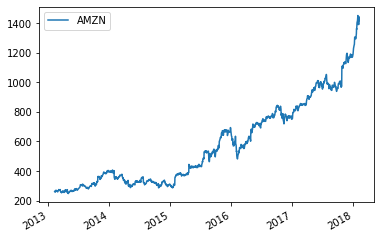

In [17]:
amzn.plot();

In [18]:
amzn_ret = np.log(amzn.pct_change(1) + 1)

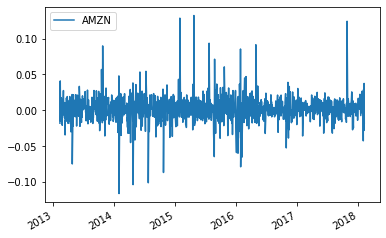

In [19]:
amzn_ret.plot();

In [21]:
#yse pd's rolling function with a window of 10
amzn['SMA-10'] = amzn['AMZN'].rolling(10).mean()
amzn.head(20)

,AMZN,SMA-10
2013-02-08,261.95,NaN
2013-02-11,257.21,NaN
2013-02-12,258.70,NaN
2013-02-13,269.47,NaN
2013-02-14,269.24,NaN
2013-02-15,265.09,NaN
2013-02-19,269.75,NaN
2013-02-20,266.41,NaN
2013-02-21,265.94,NaN
2013-02-22,265.42,264.918


In [22]:
type(amzn['AMZN'].rolling(10))

pandas.core.window.rolling.Rolling

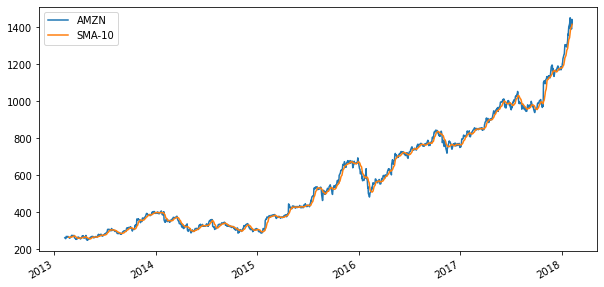

In [23]:
amzn.plot(figsize=(10,5));

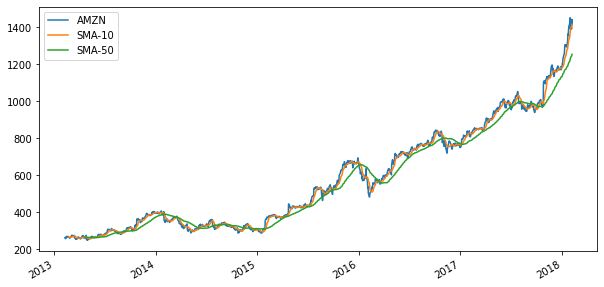

In [25]:
amzn['SMA-50'] = amzn['AMZN'].rolling(50).mean()
amzn.plot(figsize=(10, 5));

In [26]:
amzn_nflx = close[['AMZN', 'NFLX']].copy().dropna()
cov = amzn_nflx.rolling(50).cov()
cov

AMZN         NFLX
2013-02-08 AMZN          NaN          NaN
           NFLX          NaN          NaN
2013-02-11 AMZN          NaN          NaN
           NFLX          NaN          NaN
2013-02-12 AMZN          NaN          NaN
...                      ...          ...
2018-02-05 NFLX  2828.331239   952.821442
2018-02-06 AMZN  9427.068829  3011.992641
           NFLX  3011.992641  1004.905434
2018-02-07 AMZN  9902.157246  3158.835111
           NFLX  3158.835111  1050.235496

[2518 rows x 2 columns]

In [ ]:
cov.loc['2018-02-07'].to_numpy()

In [27]:
amzn_nflx_ret = np.log(1 + amzn_nflx.pct_change(1))
amzn_nflx_ret.head()

,AMZN,NFLX
2013-02-08,NaN,NaN
2013-02-11,-0.018261,-0.017166
2013-02-12,0.005776,0.000338
2013-02-13,0.040788,0.045688
2013-02-14,-0.000854,0.006055


In [28]:
amzn_nflx_ret['AMZN-SMA-50'] = amzn_nflx_ret['AMZN'].rolling(50).mean()
amzn_nflx_ret['NFLX-SMA-50'] = amzn_nflx_ret['NFLX'].rolling(50).mean()

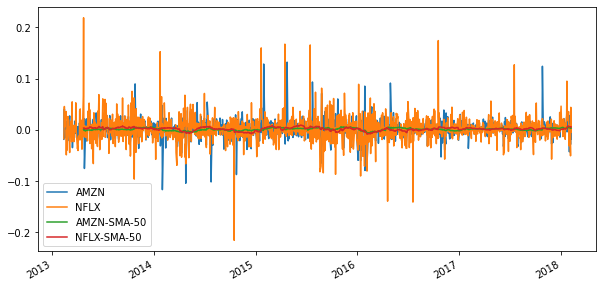

In [29]:
amzn_nflx_ret.plot(figsize=(10, 5));

In [30]:
cov = amzn_nflx_ret[['AMZN-SMA-50', 'NFLX-SMA-50']].rolling(50).cov()
cov.tail()

AMZN-SMA-50   NFLX-SMA-50
2018-02-05 NFLX-SMA-50  6.942960e-07  6.435981e-06
2018-02-06 AMZN-SMA-50  3.298785e-07  7.399429e-07
           NFLX-SMA-50  7.399429e-07  6.789857e-06
2018-02-07 AMZN-SMA-50  3.299978e-07  7.166968e-07
           NFLX-SMA-50  7.166968e-07  7.122072e-06

In [31]:
corr = amzn_nflx_ret[['AMZN-SMA-50', 'NFLX-SMA-50']].rolling(50).corr()
corr.tail(16)

AMZN-SMA-50  NFLX-SMA-50
2018-01-29 AMZN-SMA-50     1.000000     0.245322
           NFLX-SMA-50     0.245322     1.000000
2018-01-30 AMZN-SMA-50     1.000000     0.339442
           NFLX-SMA-50     0.339442     1.000000
2018-01-31 AMZN-SMA-50     1.000000     0.406263
           NFLX-SMA-50     0.406263     1.000000
2018-02-01 AMZN-SMA-50     1.000000     0.423457
           NFLX-SMA-50     0.423457     1.000000
2018-02-02 AMZN-SMA-50     1.000000     0.468265
           NFLX-SMA-50     0.468265     1.000000
2018-02-05 AMZN-SMA-50     1.000000     0.471300
           NFLX-SMA-50     0.471300     1.000000
2018-02-06 AMZN-SMA-50     1.000000     0.494414
           NFLX-SMA-50     0.494414     1.000000
2018-02-07 AMZN-SMA-50     1.000000     0.467495
           NFLX-SMA-50     0.467495     1.000000